In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("DS_jOBs.csv")

In [3]:
dataset

,work_year,salary,salary_in_usd,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022.0,186597.0,136086.0,Machine Learning Engineer in office,Analysis,EUR,US,MI,CT,Remote,DE,L
1,2020.0,110630.0,67982.0,Statistician (Remote),ML/AI,JPY,JP,EX,FL,Remote,IN,M
2,2022.0,61280.0,153309.0,Machine Learning Engineer,ML/AI,INR,UK,MI,CT,Hybrid,CN,L
3,2022.0,154130.0,135242.0,Data Analyst in office,ML/AI,JPY,DE,SE,FT,Hybrid,MX,L
4,2020.0,172312.0,35156.0,Statistician,Data Science,EUR,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020.0,179769.0,179111.0,Machine Learning Engineer (Remote),Data Science,EUR,UK,SE,CT,In-person,IN,S
4996,2021.0,184642.0,196373.0,Machine Learning Engineer (Remote),Data Science,EUR,CN,SE,FL,Remote,UK,S
4997,2022.0,135319.0,51366.0,Machine Learning Engineer,Analysis,GBP,UK,EN,FL,Hybrid,JP,M
4998,2021.0,58037.0,181817.0,Statistician,Data Science,EUR,US,MI,PT,Remote,DE,S


In [4]:
dataset.isnull().sum()

work_year             0
salary                0
salary_in_usd         0
job_title             0
job_category          0
salary_currency       0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [5]:
#co-variance

In [6]:
dataset.cov(numeric_only=True)

,work_year,salary,salary_in_usd
work_year,0.671596,1.583082e+03,-6.255598e+02
salary,1583.082143,5.020236e+09,3.746666e+07
salary_in_usd,-625.559809,3.746666e+07,2.412166e+09


In [7]:
dataset.corr(numeric_only=True)

,work_year,salary,salary_in_usd
work_year,1.000000,0.027264,-0.015542
salary,0.027264,1.000000,0.010767
salary_in_usd,-0.015542,0.010767,1.000000


In [8]:
dataset['work_year'].cov(dataset['salary'])

1583.0821434686936

Covariance Interpretation:

The covariance value, 1583.08, indicates a positive linear relationship between work_year and salary. This means that:

1. As work_year increases, salary tends to increase.
2. The strength of the relationship is moderate (covariance value is not extremely high or low).

In [9]:
dataset['work_year'].corr(dataset['salary_in_usd'])

-0.015542152189320039

Correlation Interpretation:

This very weak negative correlation suggests that:

1. There is no strong linear relationship between work_year and salary_in_usd.
2. As work_year increases, salary_in_usd does not consistently increase or decrease.

In [10]:
dataset

,work_year,salary,salary_in_usd,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022.0,186597.0,136086.0,Machine Learning Engineer in office,Analysis,EUR,US,MI,CT,Remote,DE,L
1,2020.0,110630.0,67982.0,Statistician (Remote),ML/AI,JPY,JP,EX,FL,Remote,IN,M
2,2022.0,61280.0,153309.0,Machine Learning Engineer,ML/AI,INR,UK,MI,CT,Hybrid,CN,L
3,2022.0,154130.0,135242.0,Data Analyst in office,ML/AI,JPY,DE,SE,FT,Hybrid,MX,L
4,2020.0,172312.0,35156.0,Statistician,Data Science,EUR,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020.0,179769.0,179111.0,Machine Learning Engineer (Remote),Data Science,EUR,UK,SE,CT,In-person,IN,S
4996,2021.0,184642.0,196373.0,Machine Learning Engineer (Remote),Data Science,EUR,CN,SE,FL,Remote,UK,S
4997,2022.0,135319.0,51366.0,Machine Learning Engineer,Analysis,GBP,UK,EN,FL,Hybrid,JP,M
4998,2021.0,58037.0,181817.0,Statistician,Data Science,EUR,US,MI,PT,Remote,DE,S


In [11]:
#VIF

In [12]:
import seaborn as sns

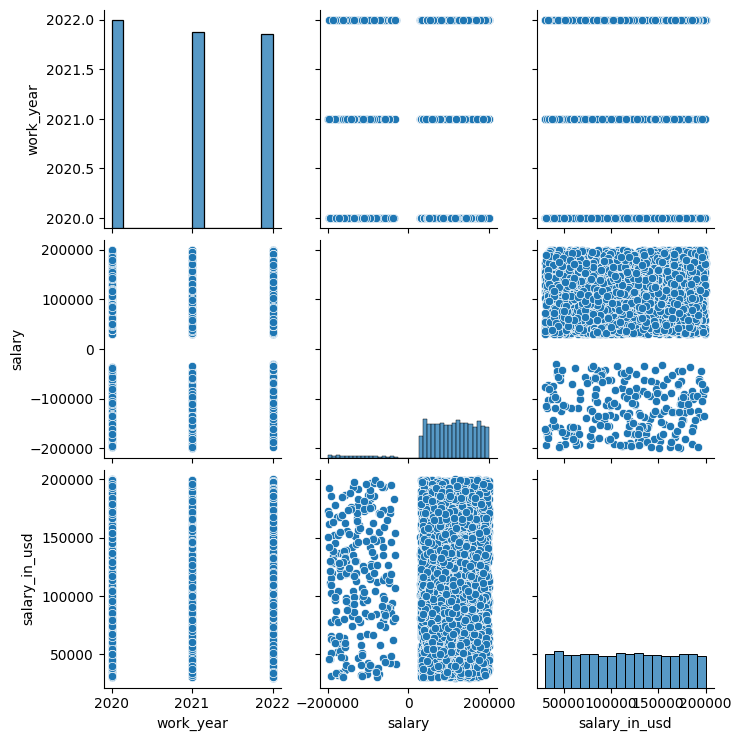

In [13]:
sns.pairplot(dataset)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [15]:
calc_vif(dataset[["salary_in_usd","work_year","salary"]])

,variables,VIF
0,salary_in_usd,6.396594
1,work_year,8.399575
2,salary,3.075162


In [16]:
calc_vif(dataset[["salary_in_usd","salary"]])

,variables,VIF
0,salary_in_usd,2.341581
1,salary,2.341581


In [17]:
 #T test

# Independant Sample- Unpaired T Test
Diferrent Group(Analysis, Data Science but same contion(salary) 

In [18]:
dataset[dataset['job_category']=='Analysis']["salary"]

0       186597.0
14       68769.0
16      132885.0
22       40910.0
32       55407.0
          ...   
4978    165915.0
4984    146726.0
4992     37404.0
4993     44674.0
4997    135319.0
Name: salary, Length: 1108, dtype: float64

In [19]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Analysis = dataset[dataset['job_category']=='Analysis']['salary']
DataScience = dataset[dataset['job_category']=='Data Science']['salary']
#print(DataAnalystOffice)
ttest_ind(Analysis, DataScience)

TtestResult(statistic=10.946358629601844, pvalue=2.479606214249017e-27, df=2779.0)

Data Science professionals earn significantly higher salaries than Analysis professionals (p < 0.0001, t-statistic = 10.95).

In [20]:
#Diferrent Group(Engineering, ML/AI) but same contion(salary) 

In [21]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Engineering = dataset[dataset['job_category']=='Engineering']['salary']
ML_AI = dataset[dataset['job_category']=='ML/AI']['salary']
ttest_ind(Engineering, ML_AI)

TtestResult(statistic=-0.5305417418889176, pvalue=0.5957895121733099, df=2217.0)

There is no statistically significant difference in salaries between Engineering and ML/AI professionals (p = 0.5958).

In [22]:
#Diferrent Group(Engineering, Analysis) but same contion(salary_in_usd) 

In [23]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Engineering = dataset[dataset['job_category']=='Engineering']['salary_in_usd']
Analysis = dataset[dataset['job_category']=='Analysis']['salary_in_usd']
ttest_ind(Engineering, Analysis)

TtestResult(statistic=-0.10437618953915473, pvalue=0.9168804454723688, df=2174.0)

Engineering and Analysis professionals have statistically equivalent salaries (p = 0.9169).

#### Dependant Sample-Paired T_Test
Same Group(Engineering) but Different Condition(salary,salary_in_usd)

In [24]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
Engineering = dataset[dataset['job_category']=='Engineering']['salary']
Engineering1 = dataset[dataset['job_category']=='Engineering']['salary_in_usd']
ttest_rel(Engineering, Engineering1)

TtestResult(statistic=0.43338699841583744, pvalue=0.6648212432987688, df=1067)

Engineering professionals' salaries show no significant difference in reported values (p = 0.6648).

In [25]:
#Same Group(Analysis) but Different Condition(salary_in_usd,salary)

In [26]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
Analysis = dataset[dataset['job_category']=='Analysis']['salary_in_usd']
Analysis1 = dataset[dataset['job_category']=='Analysis']['salary']
ttest_rel(Analysis, Analysis1)

TtestResult(statistic=0.772079316607875, pvalue=0.44023224250285586, df=1107)

There is no significant difference between the 'salary' and 'salary_in_usd' values for Analysis professionals (p = 0.44).

In [27]:
#Same Group(ML/AI) but Different Condition(salary_in_usd,salary )

In [28]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['job_category']=='ML/AI']['salary_in_usd']
male1 = dataset[dataset['job_category']=='ML/AI']['salary']
ttest_rel(male, male1)

TtestResult(statistic=-0.8930818622567324, pvalue=0.3720001809721679, df=1150)

There is no significant difference between the reported 'salary' and 'salary_in_usd' values for ML/AI professionals (p = 0.372).

In [29]:
# Hypothesis Testing

In [32]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['job_category']=='Analysis']['salary_in_usd']
male1 = dataset[dataset['job_category']=='Analysis']['salary']
ttest_rel(male, male1)

TtestResult(statistic=0.772079316607875, pvalue=0.44023224250285586, df=1107)

The null hypothesis that Analysis professionals' 'salary' and 'salary_in_usd' values are equal cannot be rejected (p = 0.44).

In [33]:
# Reject Null hypothesis p<0.05
# Accept Null Hypothesi and Reject Alternate hypothsis

# ANAVO : Analysis of Variance 

In [34]:
#one-way ANOVA Code:

import scipy.stats as stats

stats.f_oneway(dataset['salary_in_usd'],dataset['salary'])

F_onewayResult(statistic=97.36923446544057, pvalue=7.31652738880516e-23)


The one-way ANOVA test reveals a statistically significant difference between 'salary_in_usd' and 'salary' (F=97.37, p<2.8e-23).

This result indicates:

1. Rejection of the null hypothesis: The mean values of 'salary_in_usd' and 'salary' are significantly different.

2. Strong evidence: The observed difference is highly unlikely to be due to chance, suggesting a systematic difference in salary reporting.

Note: The extremely low p-value (p<2.8e-23) far surpasses the typical significance threshold of 0.05.

In [ ]:
# Two-way ANOVA for Salary

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Two-way ANOVA for Salary
model_salary = ols('salary ~ C(salary_in_usd) + C(experience_level)', data=dataset).fit()
anova_salary = sm.stats.anova_lm(model_salary, typ=2)

# Two-way ANOVA for Salary in USD
model_salary_usd = ols('salary_in_usd ~ C(experience_level) + C(employee_residence)', data=dataset).fit()
anova_salary_usd = sm.stats.anova_lm(model_salary_usd, typ=2)

print("Salary Two-way ANOVA:")
print(anova_salary)
print("\nSalary in USD Two-way ANOVA:")
print(anova_salary_usd)

Salary Two-way ANOVA:
                           sum_sq      df         F    PR(>F)
C(salary_in_usd)     2.315082e+13  4926.0  0.664244  0.995681
C(experience_level)  1.676613e+10     3.0  0.789891  0.503586
Residual             4.952702e+11    70.0       NaN       NaN

Salary in USD Two-way ANOVA:
                             sum_sq      df         F    PR(>F)
C(experience_level)    2.667976e+09     3.0  0.368611  0.775669
C(employee_residence)  1.664599e+10     6.0  1.149915  0.330431
Residual               1.203907e+13  4990.0       NaN       NaN


Two-way ANOVA analysis reveals:

Salary Model:

1 No significant effect of 'salary_in_usd' (p = 0.996) or 'experience_level' (p = 0.504) on 'salary'.

Salary in USD Model:

2 No significant effect of 'experience_level' (p = 0.776) or 'employee_residence' (p = 0.330) on 'salary_in_usd'.

Overall, the two-way ANOVA analysis suggests no statistically significant 